In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.utils import resample

In [6]:

df = pd.read_csv('data/water_potability.csv')

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.shape

(3276, 10)

In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df["Trihalomethanes"].mean())
# df['Sulfate'] = df['Sulfate'].fillna(df["Sulfate"].mean())

# df = df.drop(columns = ["Sulfate"])

In [ ]:
imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df)

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [15]:
df[:]= imputer.fit_transform(df_filled)

In [17]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

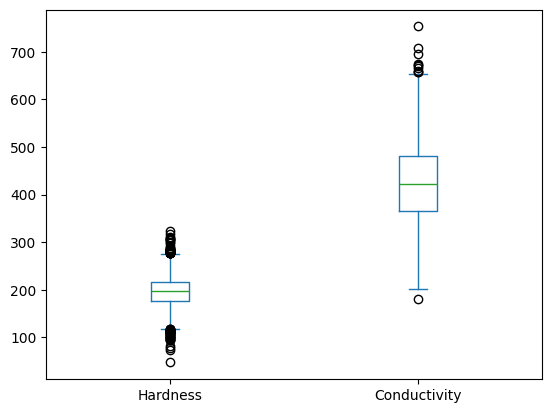

In [18]:
box_plot_cols = df[[ "Hardness", "Conductivity"]]
box_plot_cols.plot(kind="box")
plt.show()

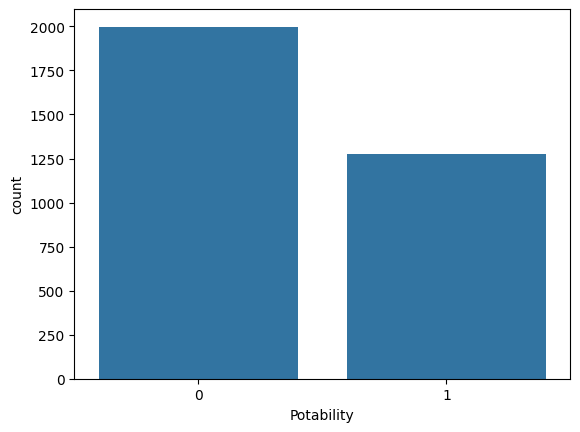

In [19]:
sns.countplot(df, x = df["Potability"])
plt.show()

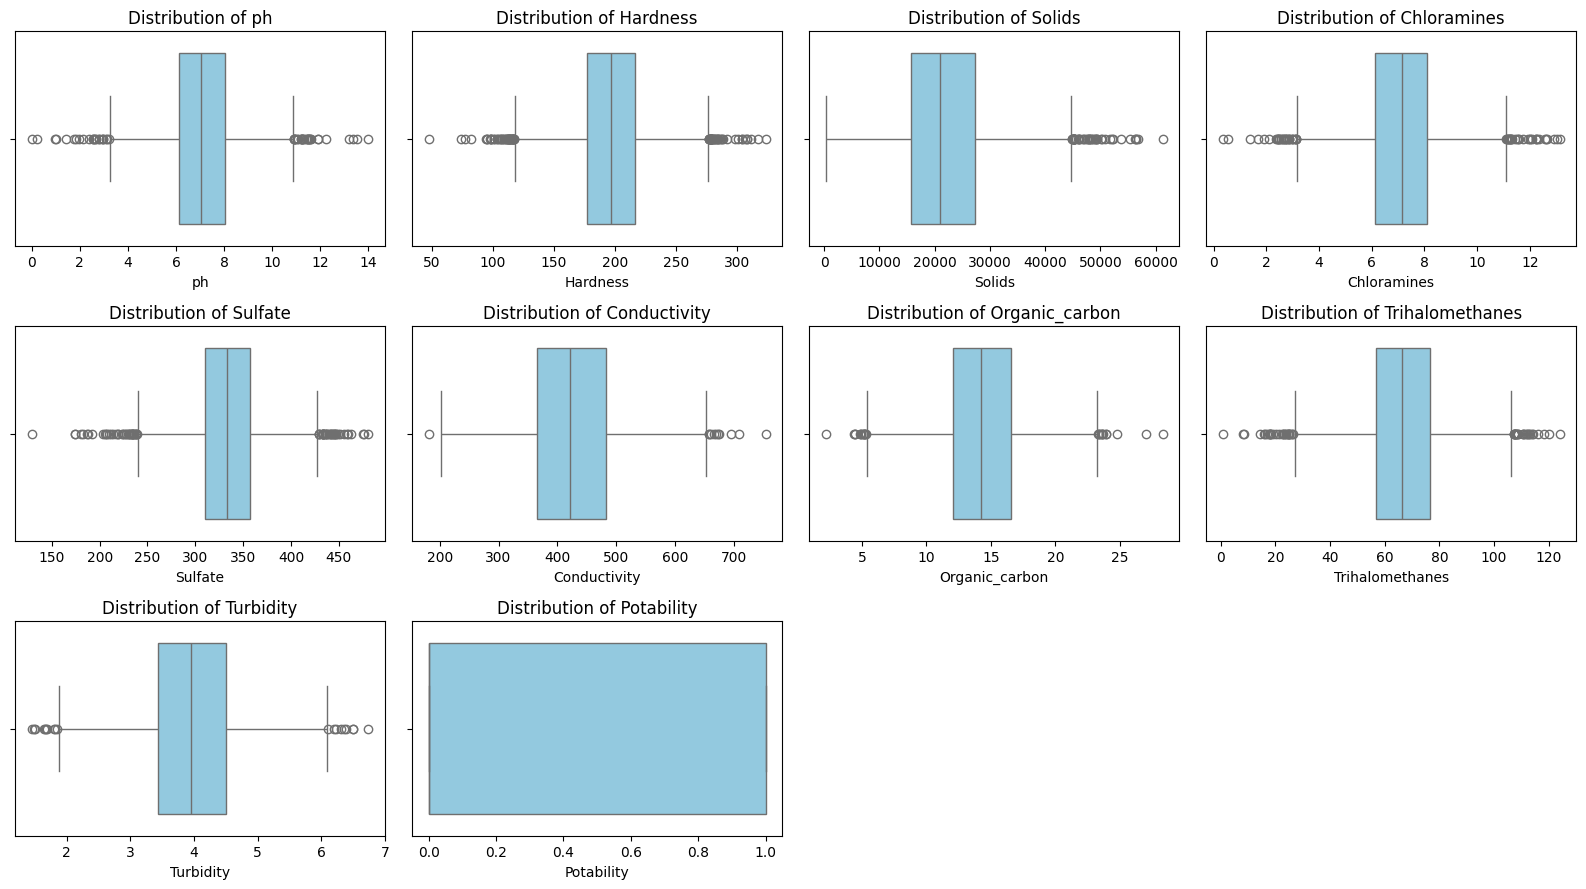

In [23]:
plt.figure(figsize=(16, 9))
plt.subplots_adjust(wspace=0.3, hspace=0.4)


o = 1
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, o)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Distribution of {col}')
    o += 1

# Display the plots
plt.tight_layout()
plt.show()

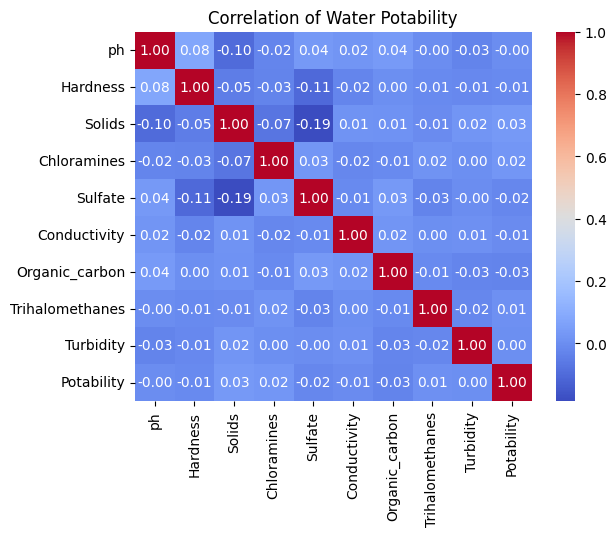

In [20]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title("Correlation of Water Potability")
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
from scipy import stats



Q1 = df['Solids'].quantile(0.25)
Q3 = df['Solids'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Solids'] >= upper)[0]
lower_array = np.where(df['Solids'] <= lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)

0       0.139471
1       0.385987
2       0.240047
3       0.000493
4       0.460249
          ...   
3271    2.916188
3272    0.534295
3273    1.270810
3274    1.144058
3275    0.525812
Name: Solids, Length: 3276, dtype: float64
New Shape:  (3229, 10)


In [ ]:

# z_scores = stats.zscore(df)
# data = df[(z_scores < 3).all(axis=1)]

# print(z_scores)

            ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0    -0.710174  0.259666 -0.101625     0.109310  0.907017      1.710487   
1    -2.217819 -2.048616 -0.365348    -0.312210 -0.190131      2.064018   
2     0.666107  0.851385 -0.209222     1.361682  0.631165     -0.092040   
3     0.809310  0.549716  0.048109     0.590514  0.603468     -0.776663   
4     1.319540 -0.467952 -0.444793    -0.368402 -0.616708     -0.341883   
...        ...       ...       ...          ...       ...           ...   
3270 -0.669255 -0.297967  0.550886     0.392875  0.311519     -0.125680   
3272  0.475119 -0.087099 -0.524009     0.591801  0.568459     -0.415631   
3273  1.534886 -0.631249  1.407095     0.141019 -0.308876      0.074213   
3274 -1.289627  1.046144 -1.176333    -0.522593  0.129695     -0.286555   
3275  0.518424 -0.039718 -0.514933     0.241854  0.043500     -1.219639   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0          -1.180649         1.30676

In [22]:
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
# undersampling 


minority_class = df[df['Potability'] == 1] # minority class
majority_class = df[df['Potability'] == 0] # majority class

# Downsample the majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the downsampled majority class with the minority class
balanced_data = pd.concat([minority_class, majority_downsampled])

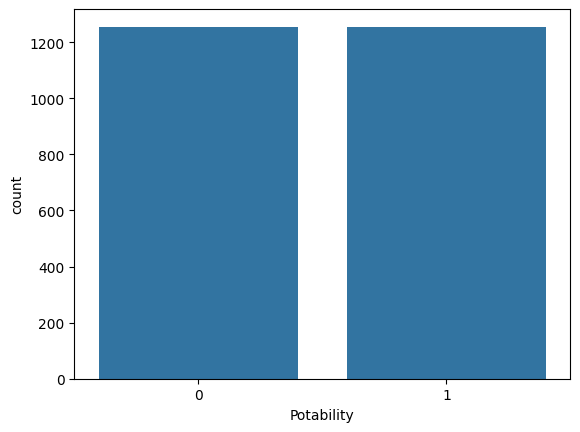

In [35]:
sns.countplot(balanced_data, x = balanced_data["Potability"])
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Y_resampled = df['Potability']
X_resampled = df.drop(['Potability'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# check the shape of X_train and X_test

X_train.shape, X_test.shape


((2583, 9), (646, 9))

In [38]:

# Train your model (e.g., a Random Forest classifier)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       409
           1       0.59      0.33      0.43       237

    accuracy                           0.67       646
   macro avg       0.64      0.60      0.60       646
weighted avg       0.65      0.67      0.64       646



In [39]:

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6703


In [40]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc_100.fit(X_train, y_train)

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


Model accuracy score with 100 decision-trees : 0.6734
